<a href="https://colab.research.google.com/github/sanjanagarai/Stock-Market-Forecasting/blob/main/Market_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#create a dataset consisting of Date, Close, Compound score, Subjectivity and Polarity
#We will create an LSTM network with 4 features
#each input will be of size = num_samples, window_size, num_features
#PAss this through the LSTM network

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [64]:
from math import *

In [3]:
data = pd.read_csv("/content/Combined_News_DJIA(train).csv")
stock_data = pd.read_csv("/content/Test_DJIA_Table.csv")

In [4]:
# Initialize an empty list to store close values
close_values = []

# Iterate over the rows of stock_data in reverse order
for index, row in stock_data[::-1].iterrows():
    close_values.append(row['Adj Close'])

data['Close'] = close_values

Index = row_number on excel - 2

In [5]:
# Check for NaN values in the dataset
print("Rows with NaN values before dropping:")
rows_with_nan_before = data[data.isnull().any(axis=1)]
print(rows_with_nan_before)

# Drop rows with NaN values
data.dropna(inplace=True)

# Print the row indices that are being dropped
print("Indices of rows being dropped:")
print(rows_with_nan_before.index)

Rows with NaN values before dropping:
           Date  Label                                               Top1  \
277  2009-09-15      1  b'The Church of Scientology won\'t be dissolve...   
348  2009-12-24      1  b'Woman knocks down Pope Benedict at Christmas...   
681  2011-04-21      1  Director of "Restrepo" and Photographer Chris ...   

                                                  Top2  \
277  b'New virus from rats can kill 80 per cent of ...   
348  b'Ugandan President Museveni says he will bloc...   
681  Everyone within 20km of Fukushima will be forc...   

                                                  Top3  \
277  b'The gruesome spectacle of dolphins being sla...   
348  b"Venezuela's Chavez threatens to kick out car...   
681  Bahrain: Activist Zaynab Al-Khawaja's letter t...   

                                                  Top4  \
277  b'The End of Innocence in Afghanistan: \'The G...   
348  b'Woman who knocked down pope had pasta in her...   
681  More tha

The rows with indices 277, 348 and 681 have been dropped

In [6]:
# Define a function to preprocess strings
def preprocess_string(s):
    if isinstance(s, str):
        if s.startswith("b\"") or s.startswith("b'"):
            s = s[2:]
        if s.endswith('"') or s.endswith("'"):
            s = s[:-1]
    return s

# Apply the preprocessing function to the 'Top' columns
for col in data.columns:
    if col.startswith('Top'):
        data[col] = data[col].apply(preprocess_string)

In [7]:
# Define a function to preprocess strings
def preprocess_string(s):
    if isinstance(s, str):
        if s.startswith("\"") or s.startswith("'"):
            s = s[1:]
        if s.endswith('"') or s.endswith("'"):
            s = s[:-1]
    return s

# Apply the preprocessing function to the 'Top' columns
for col in data.columns:
    if col.startswith('Top'):
        data[col] = data[col].apply(preprocess_string)

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [10]:
# Initialize lists to store average sentiment scores for each day
avg_compound = []

# Iterate through each row of the DataFrame
for index, row in data.iterrows():
    com = 0

    # Iterate through the entries of columns 2 to 27 for this row
    for col in row[2:27]:
        # Calculate sentiment scores for each entry
        scores = sid.polarity_scores(col)
        com += scores['compound']

    # Divide pos, neg, and neu by 25 to get the average sentiment scores for each day
    avg_compound.append(com / 25)

# Add average sentiment scores to the DataFrame
data['avg_compound'] = avg_compound


In [11]:
from textblob import TextBlob

In [12]:
# Initialize lists to store average sentiment scores for each day
avg_sub = []
avg_pol = []

# Iterate through each row of the DataFrame
for index, row in data.iterrows():
    # Initialize variables to store sentiment scores for this row
    sub = 0
    pol = 0

    # Iterate through the entries of columns 2 to 27 for this row
    for col in row[2:27]:
        # Calculate sentiment scores for each entry
        blob = TextBlob(col)
        sub += blob.sentiment.subjectivity
        pol += blob.sentiment.polarity

    # Divide pos, neg, and neu by 25 to get the average sentiment scores for each day
    avg_sub.append(sub / 25)
    avg_pol.append(pol / 25)


# Add average sentiment scores to the DataFrame
data['avg_subjectivity'] = avg_sub
data['avg_polarity'] = avg_pol

In [13]:
# Drop the columns named 'Top1' through 'Top25'
#data.drop(columns=['Top'+str(i) for i in range(1, 26)], inplace=True)

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [33]:
df1 = data.reset_index()['Close']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

train_close = df1[:1860]
test_close = df1[1761:]

time_step = 100
X_train_close, y_train_close = create_dataset(train_close, time_step)
X_test_close, y_test_close = create_dataset(test_close, time_step)

In [34]:
df2 = data.reset_index()['avg_compound']
df2 = np.array(df2).reshape(-1,1)

train_score = df2[:1860]
test_score = df2[1761:]

time_step = 100
X_train_score, y_train_score = create_dataset(train_score, time_step)
X_test_score, y_test_score = create_dataset(test_score, time_step)

In [37]:
df3 = data.reset_index()['avg_subjectivity']
df3 = np.array(df3).reshape(-1,1)

train_sub = df3[:1860]
test_sub = df3[1761:]

time_step = 100
X_train_sub, y_train_sub = create_dataset(train_sub, time_step)
X_test_sub, y_test_sub = create_dataset(test_sub, time_step)

In [42]:
df4 = data.reset_index()['avg_polarity']
df4 = np.array(df4).reshape(-1,1)

train_pol = df4[:1860]
test_pol = df4[1761:]

time_step = 100
X_train_pol, y_train_pol = create_dataset(train_pol, time_step)
X_test_pol, y_test_pol = create_dataset(test_pol, time_step)

In [43]:
df5 = data.reset_index()['Label']

train_label = df5[:1860]
test_label = df5[1761:]

time_step = 100
X_train_label, y_train_label = create_dataset(train_close, time_step)
X_test_label, y_test_label = create_dataset(test_close, time_step)

In [44]:
def concat(array1, array2, array3, array4, array5):
  li1 = array1.tolist()
  li2 = array2.tolist()
  endo=[]
  for i in range(len(li1)):
    final=[]
    for j in range(len(li1[0])):
      final.append([array1[i][j], array2[i][j], array3[i][j], array4[i][j], array5[i][j]])
    endo.append(final)
  return np.array(endo)



In [45]:
X_train = concat(X_train_close, X_train_score, X_train_sub, X_train_pol, X_train_label)
X_test = concat(X_test_close, X_test_score, X_test_sub, X_test_pol, X_test_label)

In [46]:
len(X_test)

125

In [47]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 5)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 5)

In [48]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,5)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           11200     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51651 (201.76 KB)
Trainable params: 51651 (201.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
55/55 [==============================] - 9s 165ms/step - loss: 4.6130e-04 - val_loss: 6.3177e-04
Epoch 2/100
55/55 [==============================] - 7s 133ms/step - loss: 4.2701e-04 - val_loss: 6.5462e-04
Epoch 3/100
55/55 [==============================] - 6s 109ms/step - loss: 3.7758e-04 - val_loss: 6.1788e-04
Epoch 4/100
55/55 [==============================] - 11s 209ms/step - loss: 3.5150e-04 - val_loss: 5.4094e-04
Epoch 5/100
55/55 [==============================] - 10s 182ms/step - loss: 4.3468e-04 - val_loss: 5.7066e-04
Epoch 6/100
55/55 [==============================] - 10s 179ms/step - loss: 3.9947e-04 - val_loss: 9.1641e-04
Epoch 7/100
55/55 [==============================] - 7s 126ms/step - loss: 3.7192e-04 - val_loss: 4.9835e-04
Epoch 8/100
55/55 [==============================] - 9s 156ms/step - loss: 3.4922e-04 - val_loss: 5.2421e-04
Epoch 9/100
55/55 [==============================] - 12s 229ms/step - loss: 4.5159e-04 - val_loss: 7.5597e-04
Epoch 10/100
55

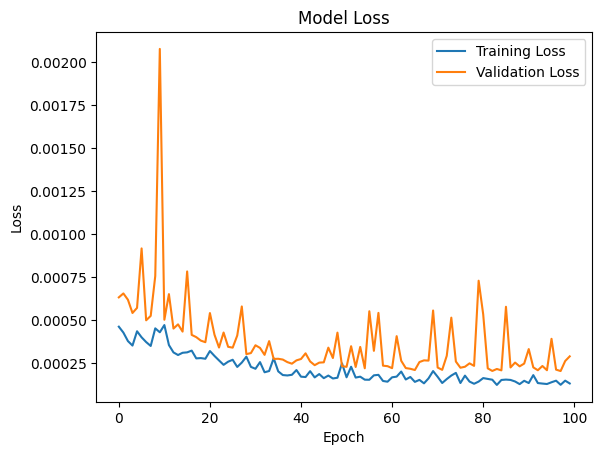

In [52]:
# Training the model
history = model.fit(X_train, y_train_close, validation_data=(X_test, y_test_close), epochs=100, batch_size=32, verbose=1)

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
test_pred = model.predict(X_test)
test_pred = scaler.inverse_transform(test_pred)
print(len(test_pred))


4/4 [==============================] - 1s 37ms/step
125


In [54]:
final = data.reset_index()['Close']
test_tr = final[1860:]

In [55]:
print(len(test_tr))

126


In [56]:
test_tr = test_tr.tolist()

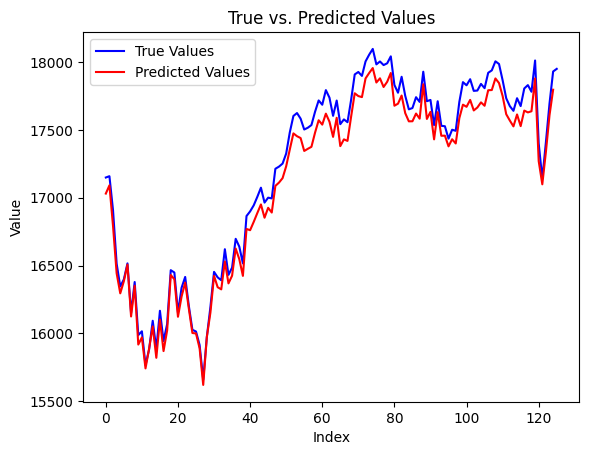

In [57]:
import matplotlib.pyplot as plt

# Assuming 'test_true' and 'test_predict' are your lists of true and predicted values

# Plot true values
plt.plot(test_tr, label='True Values', color='blue')

# Plot predicted values
plt.plot(test_pred, label='Predicted Values', color='red')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('True vs. Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()

In [58]:
final_2 = data.reset_index()['Close']

## Comparing the predictions with the actual price

In [61]:
for i in range(125):
  print(test_tr[i], " ", test_pred[i][0])

17148.93945   17030.584
17158.66016   17091.271
16906.50977   16790.502
16514.09961   16443.002
16346.4502   16295.582
16398.57031   16385.01
16516.2207   16507.352
16151.41016   16125.181
16379.04981   16351.94
15988.08008   15918.301
16016.01953   15970.865
15766.74023   15742.698
15882.67969   15888.576
16093.50977   16051.813
15885.21973   15820.696
16167.23047   16102.313
15944.45996   15870.339
16069.63965   16022.938
16466.30078   16430.662
16449.17969   16399.305
16153.54004   16123.123
16336.66016   16272.236
16416.58008   16375.034
16204.96973   16185.452
16027.04981   16003.464
16014.37988   16000.077
15914.74023   15890.404
15660.17969   15620.935
15973.83984   15973.391
16196.41016   16155.129
16453.83008   16424.371
16413.42969   16340.949
16391.99023   16324.968
16620.66016   16530.072
16431.7793   16368.951
16484.99023   16425.402
16697.28906   16625.863
16639.9707   16547.588
16516.5   16424.3
16865.08008   16769.89
16899.32031   16760.787
16943.90039   16822.168
17006

## Evaluation

In [65]:
rmse = 0
for i in range(125):
  rmse = rmse + (test_tr[i] - test_pred[i][0])**2
print(sqrt(rmse/125))

112.37279067468404


In [71]:
from sklearn.metrics import r2_score

r2 = r2_score(test_pred, test_tr[:125])

In [72]:
print(r2)

0.970837936308454
